# Alzheimers Prediction on adni dataset

_Predicting Cognitively Normal (CN), Mild Cognitive Impairment (MCI), or Alzheimers (AD)_

## Variable Descriptions
* `directory.id`	Id assigned to imaging directories. Not from LONi data
* `Subject (PTID)`	Participant ID
* `RID`	Participant roster ID
* `Image.Data.ID`	MRI ID
* `Modality`	Image type
* `Visit`	1=screening scan
* `Acq.Date`	MRI date
* `DX.bl`	Diagnosis at baseline
* `EXAMDATE`	Examination Date
* `AGE`	    Age at baseline
* `PTGENDER`	Sex
* `PTEDUCAT`	Years of Education
* `PTETHCAT`	Ethnicity
* `PTRACCAT`	Race
* `APOE4`	APOE4 genotype
* `MMSE`	MMSE score on cognitive test
* `imputed_genotype`	Challenge specific designation, TRUE=has imputed genotypes
* `APOE Genotype`	APOE allele 1 and allele 2 genotypes

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

## Exploration & Pre-processing

In [3]:
df = pd.read_csv('data/challenges/train/ADNI_Training_Q3_APOE_CollectionADNI1Complete 1Yr 1.5T_July22.2014.csv')

df.head()

directory.id     Subject  RID  Image.Data.ID Modality  \
0  4702245ea294ce5d4e9b8a87027dfdf4  011_S_0003    3          32237      MRI   
1  2e89e352af743597b2368c412e0f6de2  022_S_0004    4          64631      MRI   
2  90419199306997753de8042f1fd55e38  011_S_0005    5          32246      MRI   
3  d8d175ffff1e2053e6a18c5df494ccdf  100_S_0006    6          33025      MRI   
4  986e75b2e604cd44b38feb2188476fb2  011_S_0010   10          32270      MRI   

   Visit  Acq.Date DX.bl  EXAMDATE   AGE PTGENDER  PTEDUCAT         PTETHCAT  \
0      1    9/1/05    AD   9/12/05  81.3     Male        18  Not Hisp/Latino   
1      1   9/22/05  LMCI   11/8/05  67.5     Male        10      Hisp/Latino   
2      1    9/2/05    CN    9/7/05  73.7     Male        16  Not Hisp/Latino   
3      1  11/15/05  LMCI  11/29/05  80.4   Female        13  Not Hisp/Latino   
4      1   11/7/05    AD  11/10/05  73.9   Female        12  Not Hisp/Latino   

  PTRACCAT  APOE4  MMSE imputed_genotype APOE Genotype Dx Codes for Submission  
0    White      1    20             True           3,4                      AD  
1    White      0    27            False           3,3                     MCI  
2    White      0    29             True           3,3                      CN  
3    White      0    25             True           3,3                     MCI  
4    White      1    24             True           3,4                      AD

In [4]:
# Small dataset
df.shape

(628, 19)

In [5]:
# Class balance
df['Dx Codes for Submission'].value_counts()

MCI    305
CN     190
AD     133
Name: Dx Codes for Submission, dtype: int64

In [6]:
X = df[['AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'APOE4', 'MMSE', 'APOE Genotype']]
y_dx = df['Dx Codes for Submission']

X.head()

AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  APOE4  MMSE  \
0  81.3     Male        18  Not Hisp/Latino    White      1    20   
1  67.5     Male        10      Hisp/Latino    White      0    27   
2  73.7     Male        16  Not Hisp/Latino    White      0    29   
3  80.4   Female        13  Not Hisp/Latino    White      0    25   
4  73.9   Female        12  Not Hisp/Latino    White      1    24   

  APOE Genotype  
0           3,4  
1           3,3  
2           3,3  
3           3,3  
4           3,4

Let's convert this to a binary classification problem:

(MCI, CN) => Not AD

In [7]:
mapping = {'CN': 0, 'MCI': 0, 'AD': 1}
y = pd.Series([mapping[label] for label in y_dx])

y

0      1
1      0
2      0
3      0
4      1
      ..
623    0
624    0
625    0
626    0
627    0
Length: 628, dtype: int64

In [8]:
X['APOE Genotype'].value_counts()

3,3    276
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: APOE Genotype, dtype: int64

In [9]:
# No missing values
X.isnull().sum()

AGE              0
PTGENDER         0
PTEDUCAT         0
PTETHCAT         0
PTRACCAT         0
APOE4            0
MMSE             0
APOE Genotype    0
dtype: int64

In [10]:
X['PTGENDER'].value_counts()

Male      364
Female    264
Name: PTGENDER, dtype: int64

Categorical variable distributions:


Distribution of PTRACCAT
White    584
Black     31
Asian     13
Name: PTRACCAT, dtype: int64


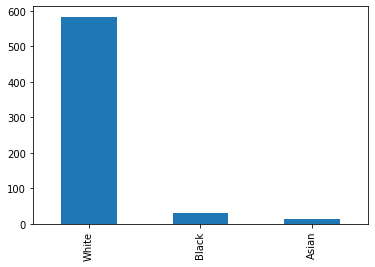


Distribution of PTETHCAT
Not Hisp/Latino    617
Hisp/Latino          8
Unknown              3
Name: PTETHCAT, dtype: int64


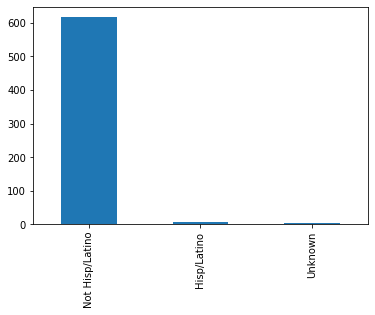


Distribution of APOE Genotype
3,3    276
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: APOE Genotype, dtype: int64


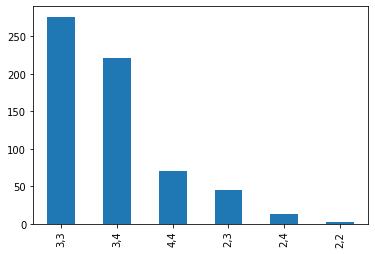


Distribution of PTGENDER
Male      364
Female    264
Name: PTGENDER, dtype: int64


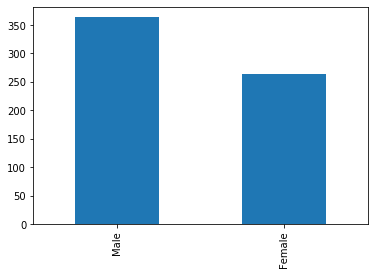


Distribution of APOE4
0    323
1    234
2     71
Name: APOE4, dtype: int64


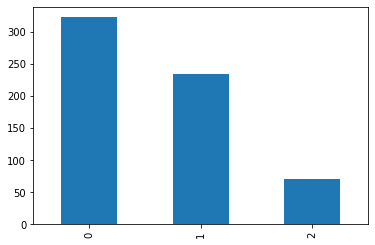

In [11]:
numerical_vars = ['AGE', 'PTEDUCAT', 'MMSE']
cat_vars = list(set(X.columns) - set(numerical_vars))

def eval_cat_vars(X, variables):
    print('Categorical variable distributions:\n')

    for var in variables:
        print('\nDistribution of', var)

        dist = X[var].value_counts()
        print(dist)
        dist.plot(kind='bar')
        plt.show()
        
eval_cat_vars(X, cat_vars)

Numerical Var Distributions:



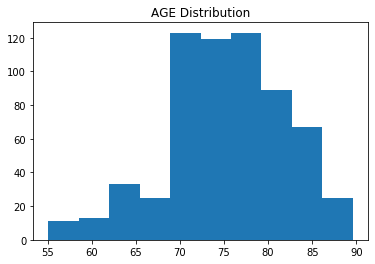

count    628.000000
mean      75.169586
std        6.687429
min       55.100000
25%       71.200000
50%       75.450000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64


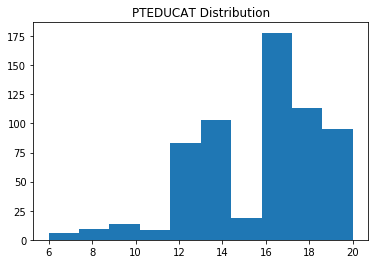

count    628.000000
mean      15.616242
std        2.977993
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64


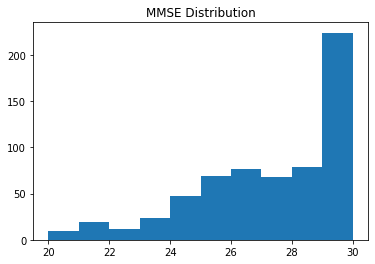

count    628.000000
mean      26.920382
std        2.562152
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

def eval_num_vars(X, variables):
    print('Numerical Var Distributions:\n')

    for var in variables:
        plt.hist(X[var], bins=10)
        plt.title(var + ' Distribution')
        plt.show()

        # descriptive stats
        print(X[var].describe())
        
eval_num_vars(X, numerical_vars)

## Pre-processing

One-hot encode

In [13]:
X.head()

AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  APOE4  MMSE  \
0  81.3     Male        18  Not Hisp/Latino    White      1    20   
1  67.5     Male        10      Hisp/Latino    White      0    27   
2  73.7     Male        16  Not Hisp/Latino    White      0    29   
3  80.4   Female        13  Not Hisp/Latino    White      0    25   
4  73.9   Female        12  Not Hisp/Latino    White      1    24   

  APOE Genotype  
0           3,4  
1           3,3  
2           3,3  
3           3,3  
4           3,4

In [14]:
for var in cat_vars:
    print('Converting', var, 'to 1-hot encoding')
    
    #get 1-hot and replace original column with the >= 2 categories as columns
    one_hot_df = pd.get_dummies(X[var])
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop(var, axis=1)
    
X.head(4)

Converting PTRACCAT to 1-hot encoding
Converting PTETHCAT to 1-hot encoding
Converting APOE Genotype to 1-hot encoding
Converting PTGENDER to 1-hot encoding
Converting APOE4 to 1-hot encoding


AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  Not Hisp/Latino  \
0  81.3        18    20      0      0      1            0                1   
1  67.5        10    27      0      0      1            1                0   
2  73.7        16    29      0      0      1            0                1   
3  80.4        13    25      0      0      1            0                1   

   Unknown  2,2  2,3  2,4  3,3  3,4  4,4  Female  Male  0  1  2  
0        0    0    0    0    0    1    0       0     1  0  1  0  
1        0    0    0    0    1    0    0       0     1  1  0  0  
2        0    0    0    0    1    0    0       0     1  1  0  0  
3        0    0    0    0    1    0    0       1     0  1  0  0

Normalize numerical values [0, 1]

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X[['AGE', 'PTEDUCAT', 'MMSE']] = scaler.fit_transform(X[['AGE', 'PTEDUCAT', 'MMSE']])
X.head()

AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  \
0  0.759420  0.857143   0.0      0      0      1            0   
1  0.359420  0.285714   0.7      0      0      1            1   
2  0.539130  0.714286   0.9      0      0      1            0   
3  0.733333  0.500000   0.5      0      0      1            0   
4  0.544928  0.428571   0.4      0      0      1            0   

   Not Hisp/Latino  Unknown  2,2  2,3  2,4  3,3  3,4  4,4  Female  Male  0  1  \
0                1        0    0    0    0    0    1    0       0     1  0  1   
1                0        0    0    0    0    1    0    0       0     1  1  0   
2                1        0    0    0    0    1    0    0       0     1  1  0   
3                1        0    0    0    0    1    0    0       1     0  1  0   
4                1        0    0    0    0    0    1    0       1     0  0  1   

   2  
0  0  
1  0  
2  0  
3  0  
4  0

## Train & Validate

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (502, 20)
Test set: (126, 20)


In [17]:
# Careful of a little class imbalance
print(y_train.value_counts())
print(y_test.value_counts())

0    392
1    110
dtype: int64
0    103
1     23
dtype: int64


First, compare a few models with their default hyperparameters.

In [18]:
y_train

332    0
6      0
104    0
114    0
482    0
      ..
71     0
106    0
270    0
435    0
102    1
Length: 502, dtype: int64

**Note:** There was a prior subsample for a validation set that was used here to compare models. 

Variables: `X_valid`, `y_valid`

In [21]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()

# # Fit the model on the training data
# lr.fit(X_train, y_train)

# # Make predictions on the validation data
# y_pred = lr.predict(X_valid)

In [22]:
# from sklearn.metrics import accuracy_score

# lr_accuracy = accuracy_score(y_pred, y_valid)
# print(f"Logistic Regression Validation Accuracy: {lr_accuracy:.2%}")

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf.predict(X_valid)

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_pred, y_valid)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.2%}")

Random Forest Validation Accuracy: 68.25%


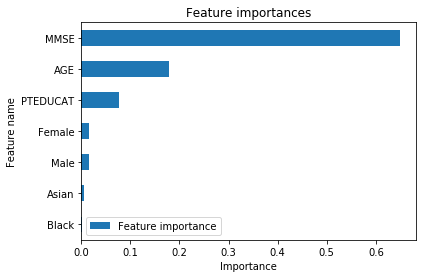

In [25]:
feat_importances = gb.feature_importances_[:7]
feat_names = X_train.columns[:7]
feat_importances_df = pd.DataFrame({'Feature name':feat_names, 'Feature importance':feat_importances})
feat_importances_df.sort_values(by='Feature importance', inplace=True)
feat_importances_df.plot(kind='barh', x='Feature name', y='Feature importance')
plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.show()

### Some hyperparemeter tuning

In [1]:
# learning_rates = [0.01, 0.05, .1, .2]
# n_estimators = [50, 100, 300]
# min_samples_splits = [2, 3, 4]
# max_depths = [2,3,4,5]
# max_features = ['auto', 'sqrt', 'log2']

### Evaluate on the test set

In [25]:
# Predict on test set
y_pred = gb.predict(X_test)

# Evaluate predictions
test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_acc:.2%}")

Test accuracy: 90.48%


/Users/grantgasser/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


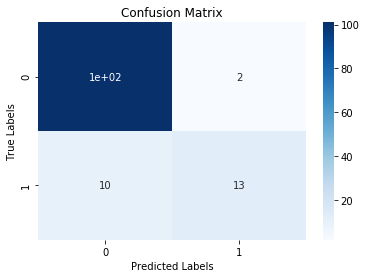

In [26]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

fix, ax = plt.subplots(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)

# plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", ax=ax)
ax.set_ylim(2, 0)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title('Confusion Matrix')
plt.show()

In [27]:
cm

array([[101,   2],
       [ 10,  13]])

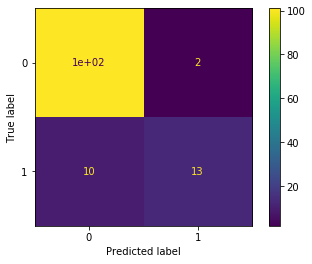

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot()
plt.show()

In [29]:
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.87
Recall: 0.57
F1: 0.68
AUC: 0.77


**Chose 0.1 with a bit of trial and error, Would need to do so with a validation set**

In [30]:
thresh = 0.1

probs = gb.predict_proba(X_test)[:,1]
y_pred = (probs > thresh).astype(int)

In [31]:
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

Precision: 0.67
Recall: 0.87
F1: 0.75
AUC: 0.89


In [32]:
# Now we're down to only 3 False Negatives
cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 10],
       [ 3, 20]])

In [33]:
# how does accuracy fare given our new threshold?
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy: 89.68%


## Analyze Misclassifications

In [34]:
y_missed = y_pred != y_test
X_missed = X_test[y_missed]

# in case needed
missed_idx = X_missed.index

y_test_missed = y_test[y_missed]
y_pred_missed = y_pred[y_missed]
y_probs_missed = probs[y_missed]

In [35]:
y_test_missed = y_test_missed.reset_index(drop=True).rename('y_true')
y_probs_missed = pd.Series(y_probs_missed).reset_index(drop=True).rename('y_probs')
y_pred_missed = pd.Series(y_pred_missed).reset_index(drop=True).rename('y_pred')

y_concat = pd.concat([y_test_missed, y_probs_missed, y_pred_missed], axis=1)
X_missed = pd.concat([X_missed.reset_index(drop=True), y_concat], axis=1)

X_missed

AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  \
0   0.991304  0.500000   0.6      0      0      1            0   
1   0.553623  1.000000   0.6      0      0      1            0   
2   0.811594  0.785714   0.3      0      0      1            0   
3   0.710145  1.000000   0.5      0      0      1            0   
4   0.617391  0.714286   0.4      1      0      0            0   
5   0.562319  0.928571   0.6      0      0      1            0   
6   1.000000  0.714286   1.0      0      0      1            0   
7   0.710145  0.714286   0.6      0      0      1            0   
8   0.428986  0.714286   0.5      0      0      1            0   
9   0.652174  0.714286   0.6      0      0      1            0   
10  0.805797  0.357143   0.4      0      1      0            0   
11  0.594203  0.428571   0.6      0      0      1            0   
12  0.649275  0.571429   0.5      0      0      1            0   

    Not Hisp/Latino  Unknown  2,2  ...  3,4  4,4  Female  Male  0  1  2  \
0                 1        0    0  ...    0    0       0     1  1  0  0   
1                 1        0    0  ...    1    0       0     1  0  1  0   
2                 1        0    0  ...    0    1       0     1  0  0  1   
3                 1        0    0  ...    1    0       0     1  0  1  0   
4                 1        0    0  ...    0    0       0     1  1  0  0   
5                 1        0    0  ...    0    0       0     1  1  0  0   
6                 1        0    0  ...    0    0       1     0  1  0  0   
7                 1        0    0  ...    1    0       0     1  0  1  0   
8                 1        0    0  ...    0    0       0     1  1  0  0   
9                 1        0    0  ...    0    0       0     1  1  0  0   
10                1        0    0  ...    1    0       1     0  0  1  0   
11                1        0    0  ...    0    0       0     1  1  0  0   
12                1        0    0  ...    1    0       1     0  0  1  0   

    y_true   y_probs  y_pred  
0        0  0.950242       1  
1        0  0.155638       1  
2        0  0.999604       1  
3        1  0.079563       0  
4        0  0.172003       1  
5        1  0.055878       0  
6        0  0.269735       1  
7        0  0.375022       1  
8        0  0.129599       1  
9        0  0.102379       1  
10       0  0.104761       1  
11       1  0.067277       0  
12       0  0.112066       1  

[13 rows x 23 columns]

In [36]:
fps = X_missed[(X_missed['y_true'] == 0) & (X_missed['y_pred'] == 1)]
fns = X_missed[(X_missed['y_true'] == 1) & (X_missed['y_pred'] == 0)]

**False Positives**

In [37]:
# Analyze distribution of numerical values of FPs
fps[numerical_vars].describe()[:2]

AGE   PTEDUCAT   MMSE
count  10.000000  10.000000  10.00
mean    0.722029   0.678571   0.55

In [38]:
X_train[numerical_vars].describe()[:2]

AGE    PTEDUCAT       MMSE
count  502.000000  502.000000  502.00000
mean     0.582938    0.688532    0.67988

It appears our false positives are on examples where `AGE` is higher and `MMSE` is lower than the means from the training data, which seem to be reasonable mistakes given that high age and low MMSE are correlated with AD.

**False Negatives**

In [39]:
fns

AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  \
3   0.710145  1.000000   0.5      0      0      1            0   
5   0.562319  0.928571   0.6      0      0      1            0   
11  0.594203  0.428571   0.6      0      0      1            0   

    Not Hisp/Latino  Unknown  2,2  ...  3,4  4,4  Female  Male  0  1  2  \
3                 1        0    0  ...    1    0       0     1  0  1  0   
5                 1        0    0  ...    0    0       0     1  1  0  0   
11                1        0    0  ...    0    0       0     1  1  0  0   

    y_true   y_probs  y_pred  
3        1  0.079563       0  
5        1  0.055878       0  
11       1  0.067277       0  

[3 rows x 23 columns]

Predicting a new patient:

In [56]:
new_sample = new_sample = [61, 17, 30, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

new_df = pd.DataFrame([new_sample], columns=X_train.columns)
new_df

AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  Not Hisp/Latino  \
0   61        17    30      0      0      1            0                1   

   Unknown  2,2  2,3  2,4  3,3  3,4  4,4  Female  Male  0  1  2  
0        0    0    0    0    0    0    0       1     0  0  0  0

In [57]:
new_df[['AGE', 'PTEDUCAT', 'MMSE']] = scaler.transform(new_df[['AGE', 'PTEDUCAT', 'MMSE']])
new_df

AGE  PTEDUCAT  MMSE  Asian  Black  White  Hisp/Latino  \
0  0.171014  0.785714   1.0      0      0      1            0   

   Not Hisp/Latino  Unknown  2,2  2,3  2,4  3,3  3,4  4,4  Female  Male  0  1  \
0                1        0    0    0    0    0    0    0       1     0  0  0   

   2  
0  0

In [59]:
gb.predict_proba(new_df)

array([[0.996807, 0.003193]])